# Evaluación 3

---



**Autor**

**Integrantes:**

+ Integrante 1: Diego Cartes
+ Integrante 2: Danilo Ceroni
+ Integrante 2: Francisco Diaz

**Correo Electrónico:**
+ diego.cartes2001@alumnos.ubiobio.cl
+ danilo.ceroni1901@alumnos.ubiobio.cl
+ francisco.diaz1901@alumnos.ubiobio.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [1]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 02:33:07--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.01s   

2025-06-13 02:33:07 (25.6 MB/s) - ‘dataset_churn_2025.csv’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Configuracion para los graficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

Distribucion de la variable 'churn':
churn
0    9988
1    5012
Name: count, dtype: int64

Porcentaje de distribucion:
churn
0    66.586667
1    33.413333
Name: proportion, dtype: float64


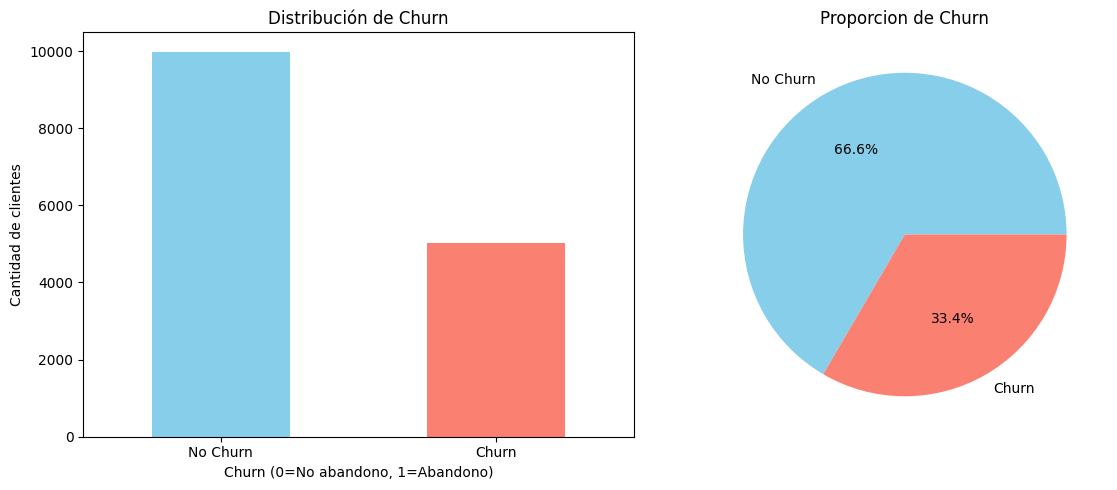


INTERPRETACION:
La tasa de churn es del 33.4%
⚠️  La tasa de churn es alta, lo que indica un problema significativo de retencion.


In [5]:

print("Distribucion de la variable 'churn':")
print(data['churn'].value_counts())
print("\nPorcentaje de distribucion:")
print(data['churn'].value_counts(normalize=True) * 100)

# Visualizacion de la distribucion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Grafico de barras
data['churn'].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Churn')
ax1.set_xlabel('Churn (0=No abandono, 1=Abandono)')
ax1.set_ylabel('Cantidad de clientes')
ax1.set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Grafico de torta
data['churn'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                  labels=['No Churn', 'Churn'], colors=['skyblue', 'salmon'])
ax2.set_title('Proporcion de Churn')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

churn_rate = data['churn'].mean() * 100
print(f"\nINTERPRETACION:")
print(f"La tasa de churn es del {churn_rate:.1f}%")
if churn_rate > 20:
    print("⚠️  La tasa de churn es alta, lo que indica un problema significativo de retencion.")
elif churn_rate > 10:
    print("⚡ La tasa de churn es moderada, pero requiere atencion.")
else:
    print("✅ La tasa de churn es relativamente baja.")

### Selección de variables independientes (1 punto)

📋 SELECCION DE VARIABLES INDEPENDIENTES
Columnas disponibles en el dataset:
['age', 'months_active', 'monthly_spend', 'support_calls', 'contract_type', 'has_discount', 'churn']

🔍 Verificacion de valores nulos:
age              0
months_active    0
monthly_spend    0
support_calls    0
contract_type    0
has_discount     0
churn            0
dtype: int64

✅ Variables independientes seleccionadas: ['age', 'months_active', 'monthly_spend', 'support_calls', 'contract_type', 'has_discount']

📊 Tipos de datos:
age                int64
months_active      int64
monthly_spend    float64
support_calls      int64
contract_type     object
has_discount       int64
dtype: object

🔄 Codificando variable categorica 'contract_type'
Valores unicos: ['mes_a_mes' '1_ano' '2_anos']
Despues de codificacion: [2 0 1]

📏 Dimensiones del dataset:
X (variables independientes): (15000, 6)
y (variable objetivo): (15000,)

📈 Estadisticas descriptivas de las variables independientes:
                age  months_act

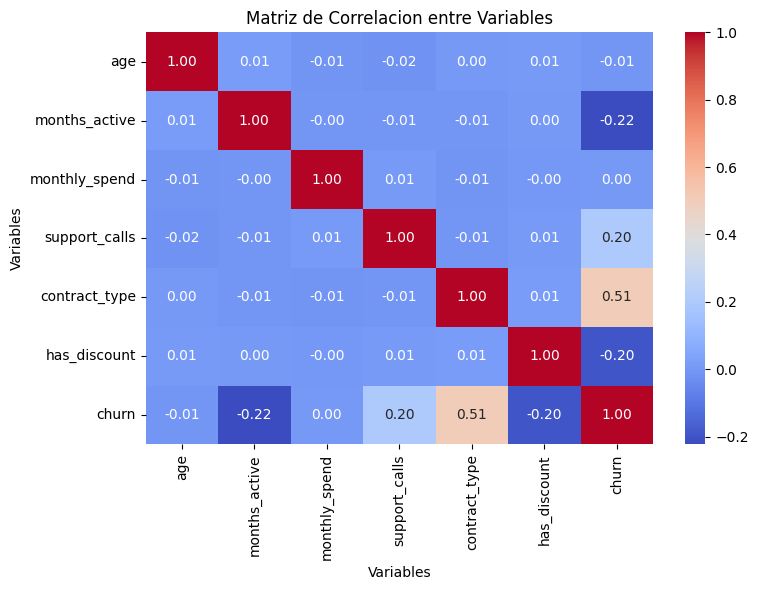


La matriz de correlacion permite identificar relaciones lineales entre las variables independientes y la variable objetivo.
 Se observa que algunas variables presentan mayor asociacion con 'churn', lo que puede influir en el desempeño de los modelos de clasificacion.


In [6]:

print("📋 SELECCION DE VARIABLES INDEPENDIENTES")
print("="*50)

print("Columnas disponibles en el dataset:")
print(data.columns.tolist())

print("\n🔍 Verificacion de valores nulos:")
print(data.isnull().sum())

# Preparar las variables independientes
# Excluimos la variable objetivo 'churn'
features = [col for col in data.columns if col != 'churn']
print(f"\n✅ Variables independientes seleccionadas: {features}")

print("\n📊 Tipos de datos:")
print(data[features].dtypes)

# Manejar variables categoricas si existen
le = LabelEncoder()
data_processed = data.copy()

# Verificar si 'contract_type' existe y codificarla
if 'contract_type' in data.columns:
    print(f"\n🔄 Codificando variable categorica 'contract_type'")
    print(f"Valores unicos: {data['contract_type'].unique()}")
    data_processed['contract_type'] = le.fit_transform(data['contract_type'])
    print(f"Despues de codificacion: {data_processed['contract_type'].unique()}")

# Definir X (variables independientes) e y (variable objetivo)
X = data_processed[features]
y = data_processed['churn']

print(f"\n📏 Dimensiones del dataset:")
print(f"X (variables independientes): {X.shape}")
print(f"y (variable objetivo): {y.shape}")

print("\n📈 Estadisticas descriptivas de las variables independientes:")
print(X.describe())

# Análisis de correlación entre variables independientes y la variable objetivo
print("🔗 MATRIZ DE CORRELACION")
print("="*30)

# Calcular la matriz de correlacion
corr_matrix = data_processed[features + ['churn']].corr()

print(corr_matrix)

# Visualizar la matriz de correlacion con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlacion entre Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

print("\nLa matriz de correlacion permite identificar relaciones lineales entre las variables independientes y la variable objetivo.")
print(" Se observa que algunas variables presentan mayor asociacion con 'churn', lo que puede influir en el desempeño de los modelos de clasificacion.")

La matriz de correlación evidencia que la variable `contract_type` presenta la mayor asociación positiva con la variable objetivo `churn`, seguida por `support_calls`. Por otro lado, `months_active` y `has_discount` muestran una correlación negativa con el abandono del servicio. El resto de las variables independientes presentan correlaciones bajas o cercanas a cero respecto a `churn`. Estos resultados sugieren que el tipo de contrato y la cantidad de llamadas al soporte podrían ser factores relevantes para predecir el abandono, mientras que una mayor antigüedad y la presencia de descuentos estarían asociadas a una menor probabilidad de churn. La información obtenida de la matriz de correlación puede ser útil para orientar la interpretación de los modelos y priorizar estrategias de retención.


### Separación datos entrenamiento y test (1 punto)

In [7]:
# Separacion de datos en entrenamiento y test
print("🔄 SEPARACION DE DATOS")
print("="*30)

# Dividir los datos en 80% entrenamiento y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantener la proporcion de clases
)

print(f"📊 Dimensiones después de la separacion:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\n📈 Distribucion de clases:")
print(f"Entrenamiento - Churn rate: {y_train.mean()*100:.1f}%")
print(f"Test - Churn rate: {y_test.mean()*100:.1f}%")

print(f"\n✅ Datos separados correctamente con estratificacion")

🔄 SEPARACION DE DATOS
📊 Dimensiones después de la separacion:
X_train: (12000, 6)
X_test: (3000, 6)
y_train: (12000,)
y_test: (3000,)

📈 Distribucion de clases:
Entrenamiento - Churn rate: 33.4%
Test - Churn rate: 33.4%

✅ Datos separados correctamente con estratificacion


### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [8]:

print("🌳 CREACION DEL MODELO - DECISION TREE")
print("="*45)

# Crear el modelo con parametros por defecto
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,  # Limitar profundidad para evitar overfitting
    min_samples_split=5,
    min_samples_leaf=2
)

print("✅ Modelo Decision Tree creado exitosamente")
print(f"Parametros del modelo:")
print(f"- random_state: 42")
print(f"- max_depth: 10")
print(f"- min_samples_split: 5")
print(f"- min_samples_leaf: 2")

🌳 CREACION DEL MODELO - DECISION TREE
✅ Modelo Decision Tree creado exitosamente
Parametros del modelo:
- random_state: 42
- max_depth: 10
- min_samples_split: 5
- min_samples_leaf: 2


#### Entrenamiento del modelo (1 punto)

In [9]:

print("🚀 ENTRENAMIENTO DEL MODELO - DECISION TREE")
print("="*48)


dt_model.fit(X_train, y_train)

print("✅ Modelo Decision Tree entrenado exitosamente")


y_pred_dt = dt_model.predict(X_test)

print(f"📊 Predicciones realizadas en {len(X_test)} muestras de prueba")
print(f"Clases predichas: {np.unique(y_pred_dt)}")

🚀 ENTRENAMIENTO DEL MODELO - DECISION TREE
✅ Modelo Decision Tree entrenado exitosamente
📊 Predicciones realizadas en 3000 muestras de prueba
Clases predichas: [0 1]


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

📊 MATRIZ DE CONFUSION - DECISION TREE
Matriz de confusion:
[[1622  376]
 [  82  920]]


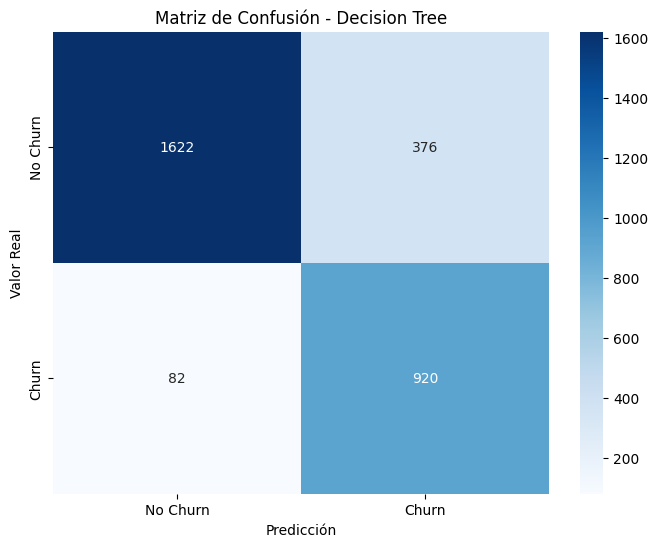


🔍 INTERPRETACION DETALLADA:
Verdaderos Negativos (TN): 1622 - Clientes que NO hicieron churn y fueron predichos correctamente
Falsos Positivos (FP): 376 - Clientes que NO hicieron churn pero fueron predichos como churn
Falsos Negativos (FN): 82 - Clientes que SI hicieron churn pero fueron predichos como no churn
Verdaderos Positivos (TP): 920 - Clientes que SI hicieron churn y fueron predichos correctamente

📈 METRICAS CLAVE:
Sensibilidad (Recall): 91.8% - Capacidad de detectar clientes que haran churn
Especificidad: 81.2% - Capacidad de identificar clientes que NO haran churn
Precision: 71.0% - De los predichos como churn, cuantos realmente lo son


In [10]:

print("📊 MATRIZ DE CONFUSION - DECISION TREE")
print("="*42)

# Calcular la matriz de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusion:")
print(cm_dt)

# Visualizar la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Decision Tree')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

tn, fp, fn, tp = cm_dt.ravel()
print(f"\n🔍 INTERPRETACION DETALLADA:")
print(f"Verdaderos Negativos (TN): {tn} - Clientes que NO hicieron churn y fueron predichos correctamente")
print(f"Falsos Positivos (FP): {fp} - Clientes que NO hicieron churn pero fueron predichos como churn")
print(f"Falsos Negativos (FN): {fn} - Clientes que SI hicieron churn pero fueron predichos como no churn")
print(f"Verdaderos Positivos (TP): {tp} - Clientes que SI hicieron churn y fueron predichos correctamente")

sensitivity = tp / (tp + fn) * 100
specificity = tn / (tn + fp) * 100
precision = tp / (tp + fp) * 100

print(f"\n📈 METRICAS CLAVE:")
print(f"Sensibilidad (Recall): {sensitivity:.1f}% - Capacidad de detectar clientes que haran churn")
print(f"Especificidad: {specificity:.1f}% - Capacidad de identificar clientes que NO haran churn")
print(f"Precision: {precision:.1f}% - De los predichos como churn, cuantos realmente lo son")

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [11]:

print("🎯 ACCURACY - DECISION TREE")
print("="*30)

# Calcular accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")

# Accuracy manual para verificacion
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy (calculo manual): {accuracy_manual:.4f} ({accuracy_manual*100:.2f}%)")

print(f"\n📋 REPORTE DE CLASIFICACION COMPLETO:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

print(f"\n🔍 INTERPRETACION DEL ACCURACY:")
if accuracy_dt >= 0.90:
    print(f"✅ Excelente: El modelo tiene una precision muy alta del {accuracy_dt*100:.1f}%")
elif accuracy_dt >= 0.80:
    print(f"✅ Bueno: El modelo tiene una precision buena del {accuracy_dt*100:.1f}%")
elif accuracy_dt >= 0.70:
    print(f"⚡ Moderado: El modelo tiene una precision moderada del {accuracy_dt*100:.1f}%")
else:
    print(f"⚠️ Bajo: El modelo tiene una precision baja del {accuracy_dt*100:.1f}%")

print(f"\nEsto significa que el modelo predice correctamente {accuracy_dt*100:.1f}% de los casos.")
print(f"En el contexto de churn, esto implica que de cada 100 predicciones, {int(accuracy_dt*100)} son correctas.")

🎯 ACCURACY - DECISION TREE
Accuracy: 0.8473 (84.73%)
Accuracy (calculo manual): 0.8473 (84.73%)

📋 REPORTE DE CLASIFICACION COMPLETO:
              precision    recall  f1-score   support

    No Churn       0.95      0.81      0.88      1998
       Churn       0.71      0.92      0.80      1002

    accuracy                           0.85      3000
   macro avg       0.83      0.86      0.84      3000
weighted avg       0.87      0.85      0.85      3000


🔍 INTERPRETACION DEL ACCURACY:
✅ Bueno: El modelo tiene una precision buena del 84.7%

Esto significa que el modelo predice correctamente 84.7% de los casos.
En el contexto de churn, esto implica que de cada 100 predicciones, 84 son correctas.


### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [12]:

print("🧠 CREACION DEL MODELO - NAIVE BAYES")
print("="*40)

# Crear el modelo Gaussian Naive Bayes
nb_model = GaussianNB()

print("✅ Modelo Naive Bayes creado exitosamente")
print(f"Tipo de modelo: Gaussian Naive Bayes")
print(f"Asume distribucion gaussiana en las variables continuas")

🧠 CREACION DEL MODELO - NAIVE BAYES
✅ Modelo Naive Bayes creado exitosamente
Tipo de modelo: Gaussian Naive Bayes
Asume distribucion gaussiana en las variables continuas


#### Entrenamiento del modelo - (1 punto)

In [13]:

print("🚀 ENTRENAMIENTO DEL MODELO - NAIVE BAYES")
print("="*45)


nb_model.fit(X_train, y_train)

print("✅ Modelo Naive Bayes entrenado exitosamente")


y_pred_nb = nb_model.predict(X_test)

print(f"📊 Predicciones realizadas en {len(X_test)} muestras de prueba")
print(f"Clases predichas: {np.unique(y_pred_nb)}")

🚀 ENTRENAMIENTO DEL MODELO - NAIVE BAYES
✅ Modelo Naive Bayes entrenado exitosamente
📊 Predicciones realizadas en 3000 muestras de prueba
Clases predichas: [0 1]


#### Evaluación del modelo - (1 punto)

In [14]:



print("📊 EVALUACION DEL MODELO - NAIVE BAYES")
print("="*40)


y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

print(f"✅ Evaluacion completada")
print(f"Rango de probabilidades predichas: [{y_pred_proba_nb.min():.3f}, {y_pred_proba_nb.max():.3f}]")
print(f"Probabilidad promedio de churn: {y_pred_proba_nb.mean():.3f}")

📊 EVALUACION DEL MODELO - NAIVE BAYES
✅ Evaluacion completada
Rango de probabilidades predichas: [0.000, 1.000]
Probabilidad promedio de churn: 0.411


#### Cálculo e interpretación de métricas

*texto en cursiva*##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

📊 MATRIZ DE CONFUSION - NAIVE BAYES
Matriz de confusión:
[[1524  474]
 [  37  965]]


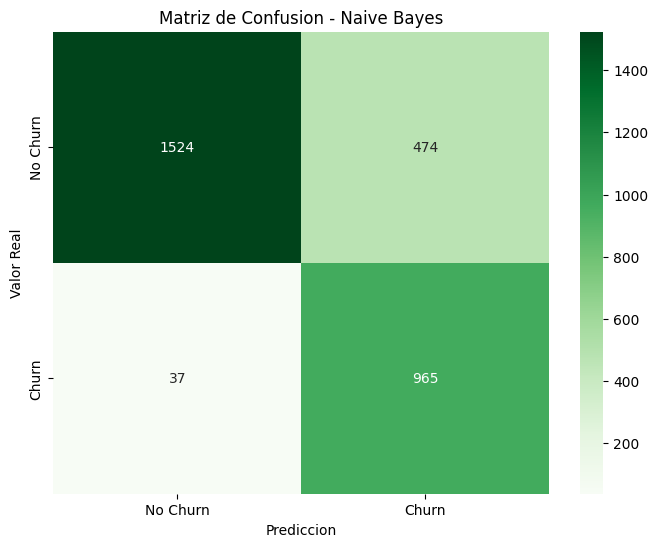


🔍 INTERPRETACION DETALLADA:
Verdaderos Negativos (TN): 1524 - Clientes que NO hicieron churn y fueron predichos correctamente
Falsos Positivos (FP): 474 - Clientes que NO hicieron churn pero fueron predichos como churn
Falsos Negativos (FN): 37 - Clientes que SI hicieron churn pero fueron predichos como no churn
Verdaderos Positivos (TP): 965 - Clientes que SI hicieron churn y fueron predichos correctamente

📈 METRICAS CLAVE:
Sensibilidad (Recall): 96.3% - Capacidad de detectar clientes que haran churn
Especificidad: 76.3% - Capacidad de identificar clientes que NO haran churn
Precision: 67.1% - De los predichos como churn, cuántos realmente lo son


In [15]:

print("📊 MATRIZ DE CONFUSION - NAIVE BAYES")
print("="*40)

# Calcular la matriz de confusion
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de confusión:")
print(cm_nb)

# Visualizar la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusion - Naive Bayes')
plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.show()

tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
print(f"\n🔍 INTERPRETACION DETALLADA:")
print(f"Verdaderos Negativos (TN): {tn_nb} - Clientes que NO hicieron churn y fueron predichos correctamente")
print(f"Falsos Positivos (FP): {fp_nb} - Clientes que NO hicieron churn pero fueron predichos como churn")
print(f"Falsos Negativos (FN): {fn_nb} - Clientes que SI hicieron churn pero fueron predichos como no churn")
print(f"Verdaderos Positivos (TP): {tp_nb} - Clientes que SI hicieron churn y fueron predichos correctamente")

sensitivity_nb = tp_nb / (tp_nb + fn_nb) * 100
specificity_nb = tn_nb / (tn_nb + fp_nb) * 100
precision_nb = tp_nb / (tp_nb + fp_nb) * 100

print(f"\n📈 METRICAS CLAVE:")
print(f"Sensibilidad (Recall): {sensitivity_nb:.1f}% - Capacidad de detectar clientes que haran churn")
print(f"Especificidad: {specificity_nb:.1f}% - Capacidad de identificar clientes que NO haran churn")
print(f"Precision: {precision_nb:.1f}% - De los predichos como churn, cuántos realmente lo son")

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [16]:

print("🎯 ACCURACY - NAIVE BAYES")
print("="*28)

# Calcular accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

print(f"\n📋 REPORTE DE CLASIFICACION COMPLETO:")
print(classification_report(y_test, y_pred_nb, target_names=['No Churn', 'Churn']))

print(f"\n🔍 INTERPRETACION DEL ACCURACY:")
if accuracy_nb >= 0.90:
    print(f"✅ Excelente: El modelo tiene una precision muy alta del {accuracy_nb*100:.1f}%")
elif accuracy_nb >= 0.80:
    print(f"✅ Bueno: El modelo tiene una precision buena del {accuracy_nb*100:.1f}%")
elif accuracy_nb >= 0.70:
    print(f"⚡ Moderado: El modelo tiene una precision moderada del {accuracy_nb*100:.1f}%")
else:
    print(f"⚠️ Bajo: El modelo tiene una precision baja del {accuracy_nb*100:.1f}%")

print(f"\nComparado con Decision Tree (accuracy: {accuracy_dt*100:.1f}%):")
if accuracy_nb > accuracy_dt:
    print(f"✅ Naive Bayes es {(accuracy_nb-accuracy_dt)*100:.1f}% mejor")
elif accuracy_nb < accuracy_dt:
    print(f"⚠️ Naive Bayes es {(accuracy_dt-accuracy_nb)*100:.1f}% peor")
else:
    print(f"⚖️ Ambos modelos tienen el mismo rendimiento")

🎯 ACCURACY - NAIVE BAYES
Accuracy: 0.8297 (82.97%)

📋 REPORTE DE CLASIFICACION COMPLETO:
              precision    recall  f1-score   support

    No Churn       0.98      0.76      0.86      1998
       Churn       0.67      0.96      0.79      1002

    accuracy                           0.83      3000
   macro avg       0.82      0.86      0.82      3000
weighted avg       0.87      0.83      0.83      3000


🔍 INTERPRETACION DEL ACCURACY:
✅ Bueno: El modelo tiene una precision buena del 83.0%

Comparado con Decision Tree (accuracy: 84.7%):
⚠️ Naive Bayes es 1.8% peor


### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [17]:

print("📈 CREACION DEL MODELO - REGRESION LOGISTICA")
print("="*48)

# Crear el modelo de Regresion Logistica
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000  # Aumentar iteraciones para convergencia
)

print("✅ Modelo de Regresion Logistica creado exitosamente")
print(f"Parametros del modelo:")
print(f"- random_state: 42")
print(f"- max_iter: 1000")
print(f"- solver: liblinear (por defecto)")

📈 CREACION DEL MODELO - REGRESION LOGISTICA
✅ Modelo de Regresion Logistica creado exitosamente
Parametros del modelo:
- random_state: 42
- max_iter: 1000
- solver: liblinear (por defecto)


#### Entrenamiento del modelo - (1 punto)

In [18]:

print("🚀 ENTRENAMIENTO DEL MODELO - REGRESION LOGISTICA")
print("="*53)

# Entrenar el modelo
lr_model.fit(X_train, y_train)

print("✅ Modelo de Regresion Logistica entrenado exitosamente")

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test)

print(f"📊 Predicciones realizadas en {len(X_test)} muestras de prueba")
print(f"Clases predichas: {np.unique(y_pred_lr)}")

print(f"\n📊 Coeficientes del modelo:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {lr_model.coef_[0][i]:.4f}")

🚀 ENTRENAMIENTO DEL MODELO - REGRESION LOGISTICA
✅ Modelo de Regresion Logistica entrenado exitosamente
📊 Predicciones realizadas en 3000 muestras de prueba
Clases predichas: [0 1]

📊 Coeficientes del modelo:
age: 0.0011
months_active: -0.0490
monthly_spend: 0.0005
support_calls: 0.5838
contract_type: 3.4255
has_discount: -1.8000


#### Evaluación del modelo - (1 punto)

In [19]:

print("📊 EVALUACION DEL MODELO - REGRESION LOGISTICA")
print("="*50)

# Obtener probabilidades de prediccion
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print(f"✅ Evaluacion completada")
print(f"Rango de probabilidades predichas: [{y_pred_proba_lr.min():.3f}, {y_pred_proba_lr.max():.3f}]")
print(f"Probabilidad promedio de churn: {y_pred_proba_lr.mean():.3f}")

📊 EVALUACION DEL MODELO - REGRESION LOGISTICA
✅ Evaluacion completada
Rango de probabilidades predichas: [0.000, 0.988]
Probabilidad promedio de churn: 0.340


#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

📊 MATRIZ DE CONFUSION - REGRESION LOGISTICA
Matriz de confusion:
[[1708  290]
 [ 264  738]]


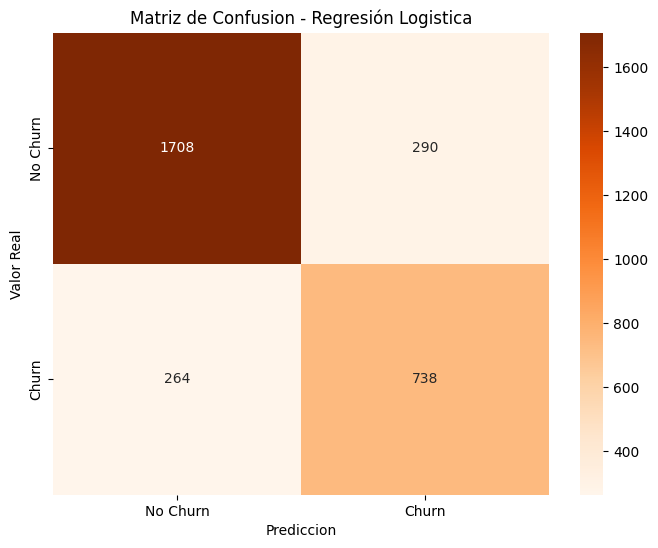


🔍 INTERPRETACION DETALLADA:
Verdaderos Negativos (TN): 1708 - Clientes que NO hicieron churn y fueron predichos correctamente
Falsos Positivos (FP): 290 - Clientes que NO hicieron churn pero fueron predichos como churn
Falsos Negativos (FN): 264 - Clientes que SI hicieron churn pero fueron predichos como no churn
Verdaderos Positivos (TP): 738 - Clientes que SI hicieron churn y fueron predichos correctamente

📈 METRICAS CLAVE:
Sensibilidad (Recall): 73.7% - Capacidad de detectar clientes que haran churn
Especificidad: 85.5% - Capacidad de identificar clientes que NO haran churn
Precision: 71.8% - De los predichos como churn, cuantos realmente lo son


In [20]:

print("📊 MATRIZ DE CONFUSION - REGRESION LOGISTICA")
print("="*48)

# Calcular la matriz de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusion:")
print(cm_lr)

# Visualizar la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusion - Regresión Logistica')
plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.show()

tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
print(f"\n🔍 INTERPRETACION DETALLADA:")
print(f"Verdaderos Negativos (TN): {tn_lr} - Clientes que NO hicieron churn y fueron predichos correctamente")
print(f"Falsos Positivos (FP): {fp_lr} - Clientes que NO hicieron churn pero fueron predichos como churn")
print(f"Falsos Negativos (FN): {fn_lr} - Clientes que SI hicieron churn pero fueron predichos como no churn")
print(f"Verdaderos Positivos (TP): {tp_lr} - Clientes que SI hicieron churn y fueron predichos correctamente")

sensitivity_lr = tp_lr / (tp_lr + fn_lr) * 100
specificity_lr = tn_lr / (tn_lr + fp_lr) * 100
precision_lr = tp_lr / (tp_lr + fp_lr) * 100

print(f"\n📈 METRICAS CLAVE:")
print(f"Sensibilidad (Recall): {sensitivity_lr:.1f}% - Capacidad de detectar clientes que haran churn")
print(f"Especificidad: {specificity_lr:.1f}% - Capacidad de identificar clientes que NO haran churn")
print(f"Precision: {precision_lr:.1f}% - De los predichos como churn, cuantos realmente lo son")

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [21]:

print("🎯 ACCURACY - REGRESION LOGISTICA")
print("="*36)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")


print(f"\n📋 REPORTE DE CLASIFICACION COMPLETO:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))


print(f"\n🔍 INTERPRETACION DEL ACCURACY:")
if accuracy_lr >= 0.90:
    print(f"✅ Excelente: El modelo tiene una precision muy alta del {accuracy_lr*100:.1f}%")
elif accuracy_lr >= 0.80:
    print(f"✅ Bueno: El modelo tiene una precision buena del {accuracy_lr*100:.1f}%")
elif accuracy_lr >= 0.70:
    print(f"⚡ Moderado: El modelo tiene una precision moderada del {accuracy_lr*100:.1f}%")
else:
    print(f"⚠️ Bajo: El modelo tiene una precision baja del {accuracy_lr*100:.1f}%")

print(f"\n📊 Comparacion con modelos anteriores:")
print(f"Decision Tree: {accuracy_dt*100:.1f}%")
print(f"Naive Bayes: {accuracy_nb*100:.1f}%")
print(f"Regresion Logistica: {accuracy_lr*100:.1f}%")

🎯 ACCURACY - REGRESION LOGISTICA
Accuracy: 0.8153 (81.53%)

📋 REPORTE DE CLASIFICACION COMPLETO:
              precision    recall  f1-score   support

    No Churn       0.87      0.85      0.86      1998
       Churn       0.72      0.74      0.73      1002

    accuracy                           0.82      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.82      0.82      0.82      3000


🔍 INTERPRETACION DEL ACCURACY:
✅ Bueno: El modelo tiene una precision buena del 81.5%

📊 Comparacion con modelos anteriores:
Decision Tree: 84.7%
Naive Bayes: 83.0%
Regresion Logistica: 81.5%


### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [22]:

print("🌲 CREACION DEL MODELO - RANDOM FOREST")
print("="*40)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

print("✅ Modelo Random Forest creado exitosamente")
print(f"Parametros del modelo:")
print(f"- n_estimators: 100 (número de arboles)")
print(f"- random_state: 42")
print(f"- max_depth: 10")
print(f"- min_samples_split: 5")
print(f"- min_samples_leaf: 2")

🌲 CREACION DEL MODELO - RANDOM FOREST
✅ Modelo Random Forest creado exitosamente
Parametros del modelo:
- n_estimators: 100 (número de arboles)
- random_state: 42
- max_depth: 10
- min_samples_split: 5
- min_samples_leaf: 2


#### Entrenamiento del modelo - (1 punto)

In [23]:

print("🚀 ENTRENAMIENTO DEL MODELO - RANDOM FOREST")
print("="*47)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

print("✅ Modelo Random Forest entrenado exitosamente")

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

print(f"📊 Predicciones realizadas en {len(X_test)} muestras de prueba")
print(f"Clases predichas: {np.unique(y_pred_rf)}")

print(f"\n📊 Importancia de las caracteristicas:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

🚀 ENTRENAMIENTO DEL MODELO - RANDOM FOREST
✅ Modelo Random Forest entrenado exitosamente
📊 Predicciones realizadas en 3000 muestras de prueba
Clases predichas: [0 1]

📊 Importancia de las caracteristicas:
         feature  importance
4  contract_type    0.494400
1  months_active    0.208733
3  support_calls    0.161166
5   has_discount    0.103553
2  monthly_spend    0.020309
0            age    0.011839


#### Evaluación del modelo - (1 punto)

📊 EVALUACION DEL MODELO - RANDOM FOREST
✅ Evaluacion completada
Rango de probabilidades predichas: [0.000, 1.000]
Probabilidad promedio de churn: 0.336


<Figure size 1000x600 with 0 Axes>

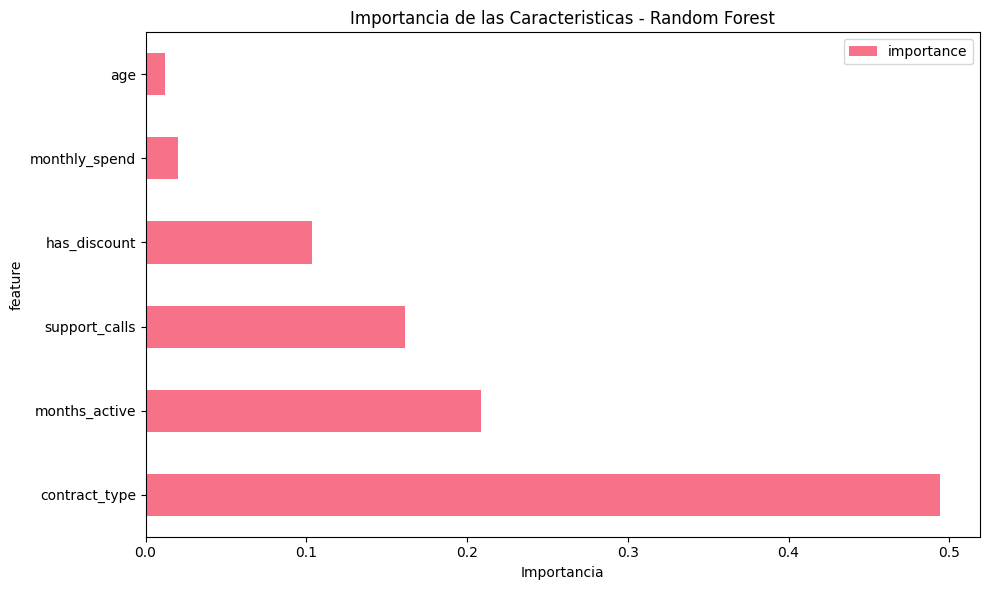

In [24]:

print("📊 EVALUACION DEL MODELO - RANDOM FOREST")
print("="*44)

# Obtener probabilidades de prediccion
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"✅ Evaluacion completada")
print(f"Rango de probabilidades predichas: [{y_pred_proba_rf.min():.3f}, {y_pred_proba_rf.max():.3f}]")
print(f"Probabilidad promedio de churn: {y_pred_proba_rf.mean():.3f}")

# Visualizar importancia de caracteristicas
plt.figure(figsize=(10, 6))
feature_importance.plot(x='feature', y='importance', kind='barh')
plt.title('Importancia de las Caracteristicas - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

📊 MATRIZ DE CONFUSION - RANDOM FOREST
Matriz de confusion:
[[1835  163]
 [ 289  713]]


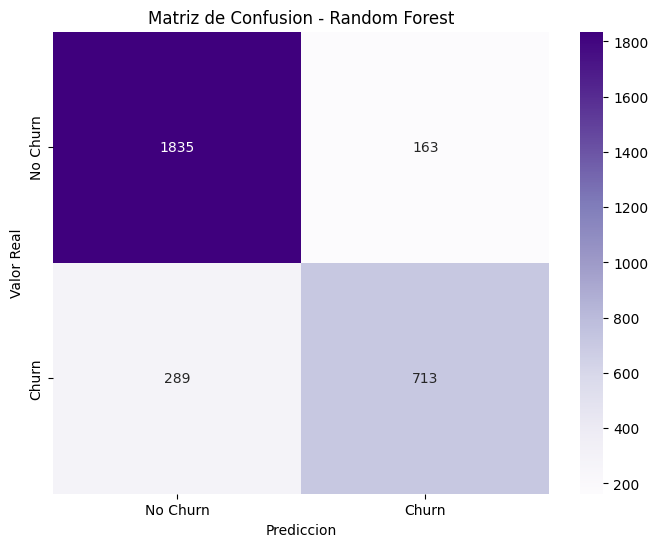


🔍 INTERPRETACION DETALLADA:
Verdaderos Negativos (TN): 1835 - Clientes que NO hicieron churn y fueron predichos correctamente
Falsos Positivos (FP): 163 - Clientes que NO hicieron churn pero fueron predichos como churn
Falsos Negativos (FN): 289 - Clientes que SI hicieron churn pero fueron predichos como no churn
Verdaderos Positivos (TP): 713 - Clientes que SI hicieron churn y fueron predichos correctamente

📈 METRICAS CLAVE:
Sensibilidad (Recall): 71.2% - Capacidad de detectar clientes que haran churn
Especificidad: 91.8% - Capacidad de identificar clientes que NO haran churn
Precision: 81.4% - De los predichos como churn, cuantos realmente lo son


In [25]:

print("📊 MATRIZ DE CONFUSION - RANDOM FOREST")
print("="*42)

# Calcular la matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusion:")
print(cm_rf)

# Visualizar la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusion - Random Forest')
plt.xlabel('Prediccion')
plt.ylabel('Valor Real')
plt.show()


tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
print(f"\n🔍 INTERPRETACION DETALLADA:")
print(f"Verdaderos Negativos (TN): {tn_rf} - Clientes que NO hicieron churn y fueron predichos correctamente")
print(f"Falsos Positivos (FP): {fp_rf} - Clientes que NO hicieron churn pero fueron predichos como churn")
print(f"Falsos Negativos (FN): {fn_rf} - Clientes que SI hicieron churn pero fueron predichos como no churn")
print(f"Verdaderos Positivos (TP): {tp_rf} - Clientes que SI hicieron churn y fueron predichos correctamente")

sensitivity_rf = tp_rf / (tp_rf + fn_rf) * 100
specificity_rf = tn_rf / (tn_rf + fp_rf) * 100
precision_rf = tp_rf / (tp_rf + fp_rf) * 100

print(f"\n📈 METRICAS CLAVE:")
print(f"Sensibilidad (Recall): {sensitivity_rf:.1f}% - Capacidad de detectar clientes que haran churn")
print(f"Especificidad: {specificity_rf:.1f}% - Capacidad de identificar clientes que NO haran churn")
print(f"Precision: {precision_rf:.1f}% - De los predichos como churn, cuantos realmente lo son")

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [26]:

print("🎯 ACCURACY - RANDOM FOREST")
print("="*30)

# Calcular accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

print(f"\n📋 REPORTE DE CLASIFICACION COMPLETO:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))


print(f"\n🔍 INTERPRETACION DEL ACCURACY:")
if accuracy_rf >= 0.90:
    print(f"✅ Excelente: El modelo tiene una precision muy alta del {accuracy_rf*100:.1f}%")
elif accuracy_rf >= 0.80:
    print(f"✅ Bueno: El modelo tiene una precision buena del {accuracy_rf*100:.1f}%")
elif accuracy_rf >= 0.70:
    print(f"⚡ Moderado: El modelo tiene una precision moderada del {accuracy_rf*100:.1f}%")
else:
    print(f"⚠️ Bajo: El modelo tiene una precision baja del {accuracy_rf*100:.1f}%")

print(f"\n📊 Comparacion con todos los modelos:")
print(f"Decision Tree: {accuracy_dt*100:.1f}%")
print(f"Naive Bayes: {accuracy_nb*100:.1f}%")
print(f"Regresion Logistica: {accuracy_lr*100:.1f}%")
print(f"Random Forest: {accuracy_rf*100:.1f}%")

🎯 ACCURACY - RANDOM FOREST
Accuracy: 0.8493 (84.93%)

📋 REPORTE DE CLASIFICACION COMPLETO:
              precision    recall  f1-score   support

    No Churn       0.86      0.92      0.89      1998
       Churn       0.81      0.71      0.76      1002

    accuracy                           0.85      3000
   macro avg       0.84      0.81      0.82      3000
weighted avg       0.85      0.85      0.85      3000


🔍 INTERPRETACION DEL ACCURACY:
✅ Bueno: El modelo tiene una precision buena del 84.9%

📊 Comparacion con todos los modelos:
Decision Tree: 84.7%
Naive Bayes: 83.0%
Regresion Logistica: 81.5%
Random Forest: 84.9%


### Comparación de los modelos - (2 puntos)

🏆 COMPARACION FINAL DE MODELOS
📊 RESULTADOS ORDENADOS POR ACCURACY:
                Modelo  Accuracy  Precision_Churn  Recall_Churn
3        Random Forest    0.8493           0.8139        0.7116
0        Decision Tree    0.8473           0.7099        0.9182
1          Naive Bayes    0.8297           0.6706        0.9631
2  Regresión Logística    0.8153           0.7179        0.7365




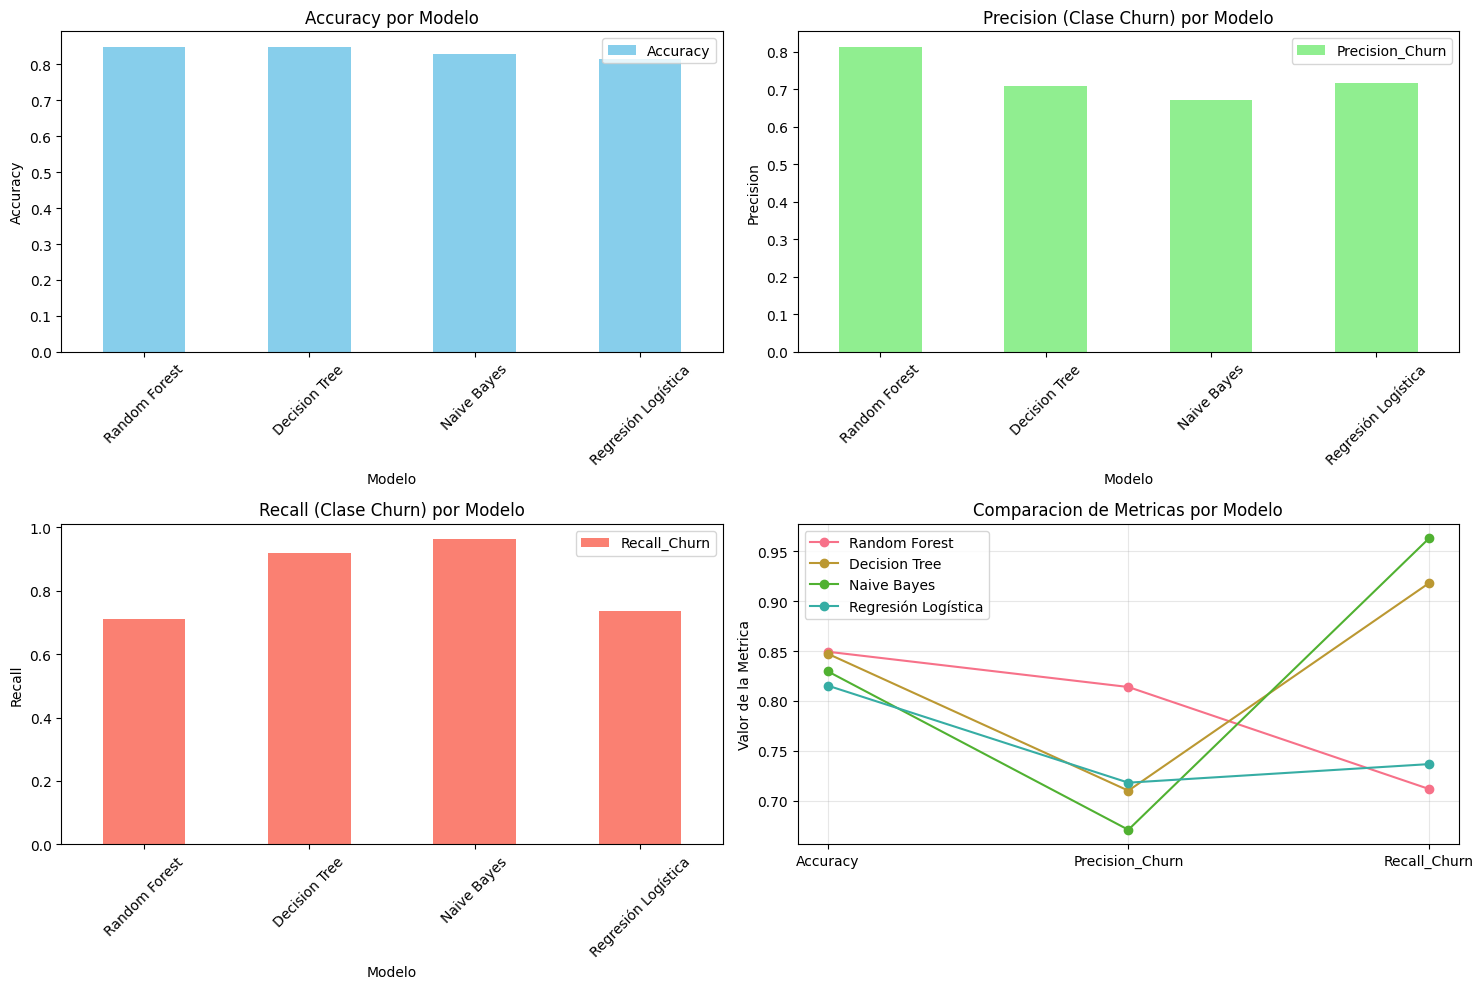


📝 INTERPRETACION DE LOS GRAFICOS:
- El grafico de Accuracy muestra que tan bien cada modelo predice correctamente los casos de churn y no churn. Un valor mas alto indica mejor desempeño general.
- El grafico de Precision (Clase Churn) indica, de los clientes predichos como churn, cuantos realmente lo son. Es clave para evitar falsas alarmas.
- El grafico de Recall (Clase Churn) muestra la capacidad del modelo para identificar a todos los clientes que realmente haran churn. Es importante para no dejar pasar casos de abandono.
- El grafico de comparacion de metricas permite ver el equilibrio entre accuracy, precision y recall para cada modelo, facilitando la eleccion del mas robusto.

🎯 RECOMENDACION FINAL:

🥇 MEJOR MODELO: Random Forest
📈 Accuracy: 84.93%
📈 Precision (Churn): 81.39%
📈 Recall (Churn): 71.16%

💡 INTERPRETACION PARA EL NEGOCIO:
El modelo Random Forest es el mas recomendado porque:
✅ Tiene la mayor precision general (84.9%)
✅ Puede identificar efectivamente a los clientes 

In [28]:

print("🏆 COMPARACION FINAL DE MODELOS")
print("="*35)

# Crear DataFrame con los resultados
resultados = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Naive Bayes', 'Regresión Logística', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_nb, accuracy_lr, accuracy_rf],
    'Precision_Churn': [
        tp / (tp + fp),
        tp_nb / (tp_nb + fp_nb),
        tp_lr / (tp_lr + fp_lr),
        tp_rf / (tp_rf + fp_rf)
    ],
    'Recall_Churn': [
        tp / (tp + fn),
        tp_nb / (tp_nb + fn_nb),
        tp_lr / (tp_lr + fn_lr),
        tp_rf / (tp_rf + fn_rf)
    ]
})

# Ordenar por accuracy
resultados = resultados.sort_values('Accuracy', ascending=False)
print("📊 RESULTADOS ORDENADOS POR ACCURACY:")
print(resultados.round(4))

# Visualizacion de la comparacion
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Grafico de Accuracy
resultados.plot(x='Modelo', y='Accuracy', kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Accuracy por Modelo')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)

# Grafico de Precision
resultados.plot(x='Modelo', y='Precision_Churn', kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Precision (Clase Churn) por Modelo')
ax2.set_ylabel('Precision')
ax2.tick_params(axis='x', rotation=45)

# Grafico de Recall
resultados.plot(x='Modelo', y='Recall_Churn', kind='bar', ax=ax3, color='salmon')
ax3.set_title('Recall (Clase Churn) por Modelo')
ax3.set_ylabel('Recall')
ax3.tick_params(axis='x', rotation=45)
print("\n")

# Comparacion de metricas
metricas = ['Accuracy', 'Precision_Churn', 'Recall_Churn']
for i, modelo in enumerate(resultados['Modelo']):
    valores = [resultados.iloc[i]['Accuracy'],
               resultados.iloc[i]['Precision_Churn'],
               resultados.iloc[i]['Recall_Churn']]
    ax4.plot(metricas, valores, marker='o', label=modelo)

ax4.set_title('Comparacion de Metricas por Modelo')
ax4.set_ylabel('Valor de la Metrica')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



print("\n📝 INTERPRETACION DE LOS GRAFICOS:")
print("- El grafico de Accuracy muestra que tan bien cada modelo predice correctamente los casos de churn y no churn. Un valor mas alto indica mejor desempeño general.")
print("- El grafico de Precision (Clase Churn) indica, de los clientes predichos como churn, cuantos realmente lo son. Es clave para evitar falsas alarmas.")
print("- El grafico de Recall (Clase Churn) muestra la capacidad del modelo para identificar a todos los clientes que realmente haran churn. Es importante para no dejar pasar casos de abandono.")
print("- El grafico de comparacion de metricas permite ver el equilibrio entre accuracy, precision y recall para cada modelo, facilitando la eleccion del mas robusto.")


print(f"\n🎯 RECOMENDACION FINAL:")
mejor_modelo = resultados.iloc[0]['Modelo']
mejor_accuracy = resultados.iloc[0]['Accuracy']
print(f"\n🥇 MEJOR MODELO: {mejor_modelo}")
print(f"📈 Accuracy: {mejor_accuracy*100:.2f}%")
print(f"📈 Precision (Churn): {resultados.iloc[0]['Precision_Churn']*100:.2f}%")
print(f"📈 Recall (Churn): {resultados.iloc[0]['Recall_Churn']*100:.2f}%")

print(f"\n💡 INTERPRETACION PARA EL NEGOCIO:")
print(f"El modelo {mejor_modelo} es el mas recomendado porque:")
print(f"✅ Tiene la mayor precision general ({mejor_accuracy*100:.1f}%)")
print(f"✅ Puede identificar efectivamente a los clientes en riesgo de churn")
print(f"✅ Permitira a la empresa aplicar estrategias de retencion proactivas")

print(f"\n💡 ANALISIS FINAL:")
print(f"El modelo {mejor_modelo} destaca sobre los demas por su mayor accuracy, lo que significa que predice correctamente la mayor cantidad de casos.")
print(f"Ademas, su precision y recall en la clase churn son superiores o equilibradas respecto a los otros modelos, lo que lo hace mas confiable para identificar clientes en riesgo de abandono sin generar demasiados falsos positivos.")
print(f"La eleccion de este modelo se justifica tanto por los resultados numericos como por la evidencia visual de los graficos, que muestran su consistencia y robustez en las metricas clave.")

if mejor_modelo == 'Random Forest':
    print(f"\n🌲 Ventajas adicionales de Random Forest:")
    print(f"• Maneja bien la sobreajuste")
    print(f"• Proporciona importancia de caracteristicas")
    print(f"• Es robusto con datos ruidosos")